Name: Advik Maniyar  <br>
Roll: 42244

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
from matplotlib import pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

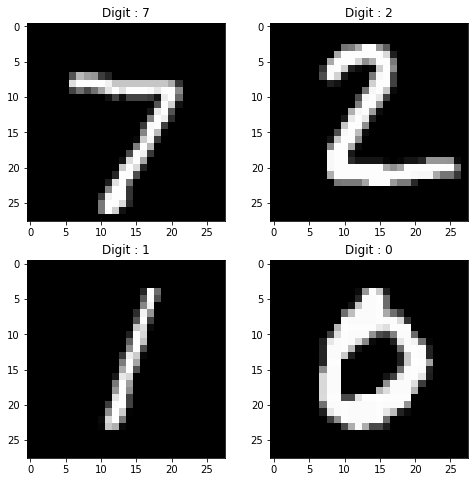

In [ ]:
plt.figure(figsize = (8,8))
plt.gray()
for i in range(4):
  plt.subplot(2, 2, i + 1)
  plt.imshow(x_test[i])
  plt.title(f"Digit : {y_test[i]}")

In [ ]:
# Normalize
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')
x_train /= 255
x_test /= 255
# Reshape
x_train = x_train.reshape(*x_train.shape, 1)
x_test = x_test.reshape(*x_test.shape, 1)

In [ ]:
input_shape = (x_train.shape[1:])

model = tf.keras.Sequential([
    tf.keras.Input(shape = input_shape),
    tfl.ZeroPadding2D(3),
    tfl.Conv2D(32, 7, strides = 1),
    tfl.ReLU(),
    tfl.MaxPooling2D(),
    tfl.Flatten(),
    tfl.Dropout(0.3),
    tfl.Dense(10, activation = 'softmax')    
])


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 34, 34, 1)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        1600      
                                                                 
 re_lu (ReLU)                (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dropout (Dropout)           (None, 6272)              0

In [ ]:
model_history = model.fit(x = x_train, y = y_train, batch_size = 128, epochs = 5)

Epoch 1/5
469/469 [==============================] - 50s 106ms/step - loss: 0.2904 - accuracy: 0.9186
Epoch 2/5
469/469 [==============================] - 47s 101ms/step - loss: 0.0944 - accuracy: 0.9725
Epoch 3/5
469/469 [==============================] - 49s 104ms/step - loss: 0.0701 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 47s 100ms/step - loss: 0.0580 - accuracy: 0.9822
Epoch 5/5
469/469 [==============================] - 47s 100ms/step - loss: 0.0511 - accuracy: 0.9842


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0388 - accuracy: 0.9859


[0.03876083344221115, 0.9858999848365784]

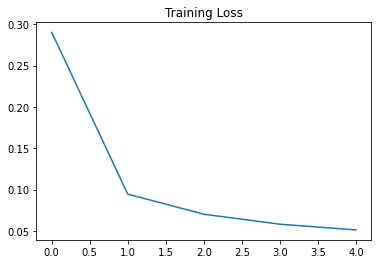

In [ ]:
plt.title("Training Loss")
plt.plot(model_history.history['loss'])

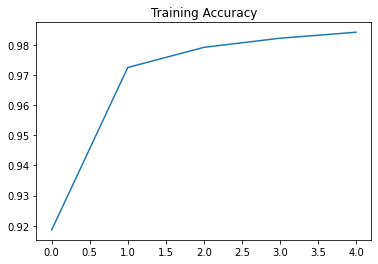

In [ ]:
plt.title("Training Accuracy")
plt.plot(model_history.history['accuracy'])